In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget 'https://www.dropbox.com/s/81pdqf9xc9zvw0u/MLWeaponDetection.zip?dl=0'

--2025-03-13 14:44:11--  https://www.dropbox.com/s/81pdqf9xc9zvw0u/MLWeaponDetection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/hk3zwc7bf7rl32z5tq72d/MLWeaponDetection.zip?rlkey=ffa1kkyiq41k8ribor7hy5vlm&dl=0 [following]
--2025-03-13 14:44:12--  https://www.dropbox.com/scl/fi/hk3zwc7bf7rl32z5tq72d/MLWeaponDetection.zip?rlkey=ffa1kkyiq41k8ribor7hy5vlm&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5f37ed425f053dae28452b3712.dl.dropboxusercontent.com/cd/0/inline/Clw2x6TvVzS9kOCFJi9e1C7DUSVZGfOKsi7JDoOuRApHDNtgvwPt-bM8cJkx1ofMOpU1KKptjzdtMcbQoKwliwSn_m99MEYLENxgf0Jp72HlN3xyR-_0_eh5vlIlBwLS6X8TIAdExyCagegCd6S8j5DR/file# [following]
--2025-03-13 14:44:12--  https://uc5f37ed425f053dae28452b37

In [3]:
!unzip '/content/MLWeaponDetection.zip?dl=0'

Archive:  /content/MLWeaponDetection.zip?dl=0
   creating: Test/knife/
  inflating: Test/knife/DefenseKnifeAttack0690.jpg  
  inflating: Test/knife/DefenseKnifeAttack0734.jpg  
  inflating: Test/knife/DefenseKnifeAttack0784.jpg  
  inflating: Test/knife/DefenseKnifeAttack0798.jpg  
  inflating: Test/knife/DefenseKnifeAttack1072.jpg  
  inflating: Test/knife/DefenseKnifeAttack1115.jpg  
  inflating: Test/knife/DefenseKnifeAttack1223.jpg  
  inflating: Test/knife/DefenseKnifeAttack1224.jpg  
  inflating: Test/knife/knife_1012.jpg  
  inflating: Test/knife/knife_1016.jpg  
  inflating: Test/knife/knife_1019.jpg  
  inflating: Test/knife/knife_102.jpg  
  inflating: Test/knife/knife_103.jpg  
  inflating: Test/knife/knife_1030.jpg  
  inflating: Test/knife/knife_1037.jpg  
  inflating: Test/knife/knife_1041.jpg  
  inflating: Test/knife/knife_1043.jpg  
  inflating: Test/knife/knife_1045.jpg  
  inflating: Test/knife/knife_1051.jpg  
  inflating: Test/knife/knife_1054.jpg  
  inflating: Te

## Building the Model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
model = InceptionV3(input_shape = (256, 256, 3), include_top = False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
for layer in model.layers:
  layer.trainable = False

In [9]:
a = Flatten()(model.output)
b = Dense(units = 2, activation = 'sigmoid')(a)
# Final model
final_model = Model(model.input, b)
final_model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy,
                    metrics = ['accuracy'])

In [ ]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

## Using ImageDataGenerator to add dimensions to model

In [10]:
train_idg = ImageDataGenerator(featurewise_center=True, rotation_range=90,
                               width_shift_range=0.1, height_shift_range=0.1,
                               horizontal_flip=True, preprocessing_function =
                               preprocess_input)

In [14]:
train_data = train_idg.flow_from_directory(directory = '/content/Train',
                                           target_size = (256, 256),
                                           batch_size = 32)

Found 2830 images belonging to 2 classes.


In [15]:
train_data.class_indices

{'knife': 0, 'pistol': 1}

## Visualize Training Data

In [17]:
t_img, label = next(train_data)

In [18]:
def plot_img(t_img, label):
  for index, img in enumerate(t_img):
    if index<=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.axis = False
      plt.show()

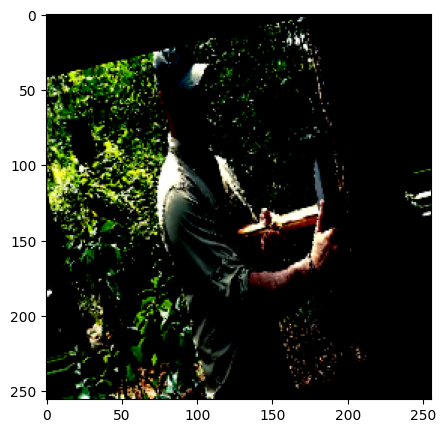

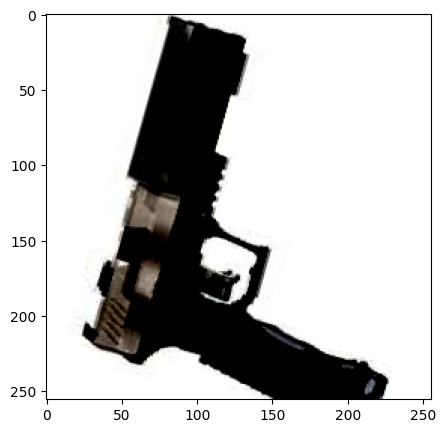

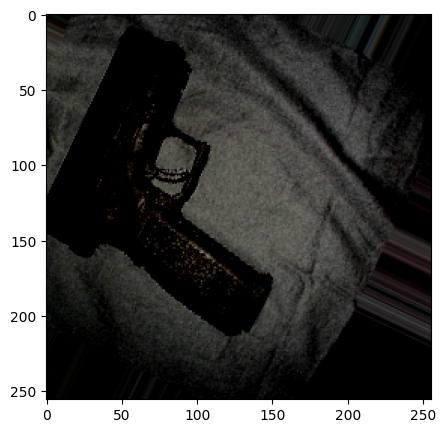

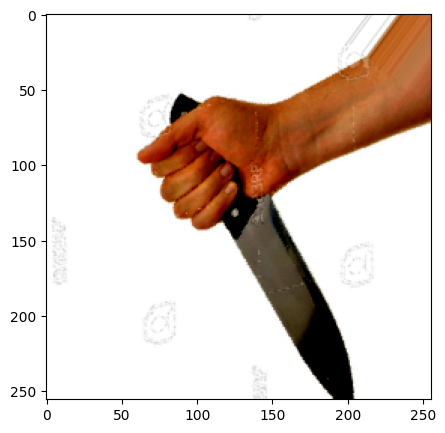

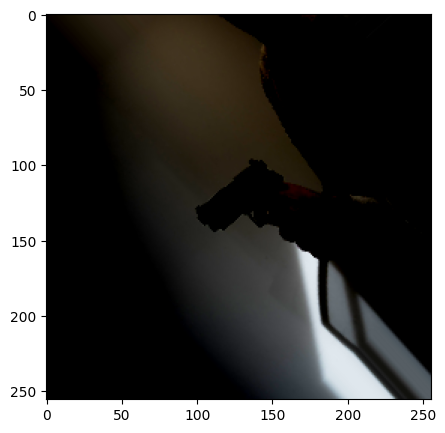

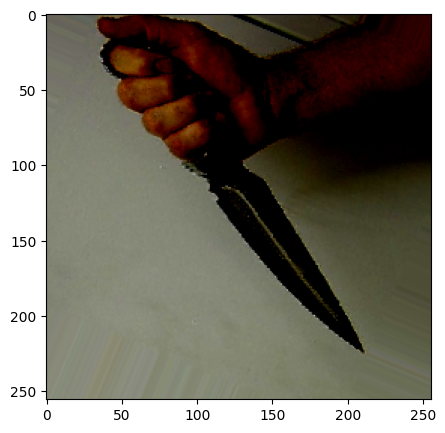

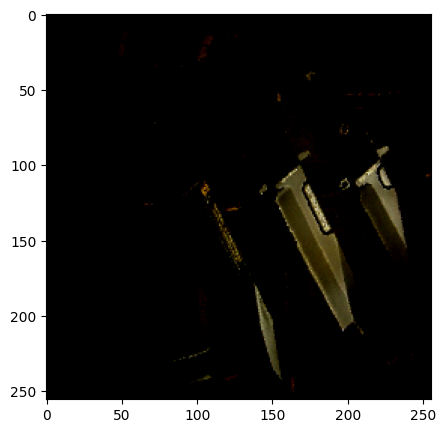

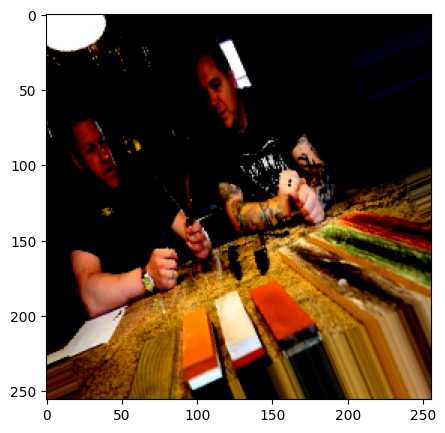

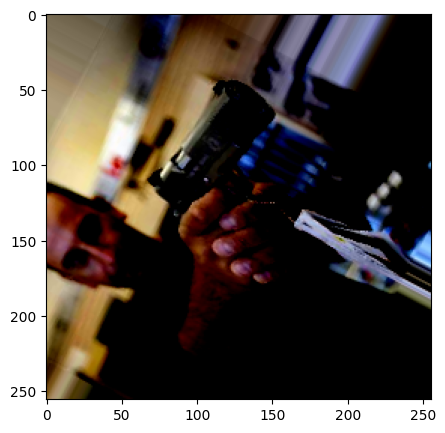

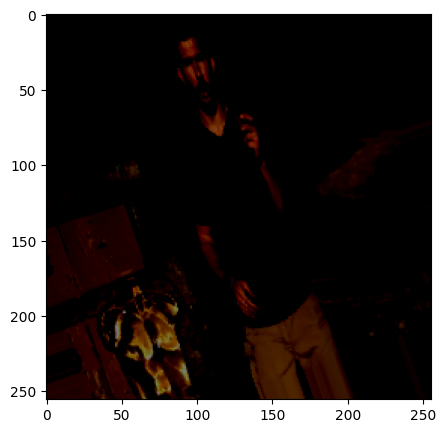

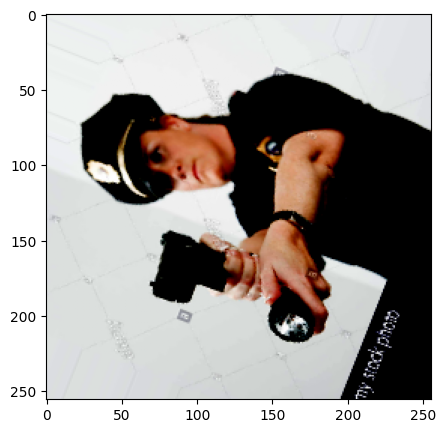

In [19]:
plot_img(t_img, label)

## Using Callback

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath = './best_model.h5', monitor = 'accuracy',
                     verbose = 1, save_best_only = True)

es = EarlyStopping(monitor = 'accuracy', min_delta = 0.01,
                   patience = 5, verbose = 1)

cb = [mc, es]

In [22]:
his = final_model.fit(train_data, steps_per_epoch=10, epochs=30,
                                callbacks=cb)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.7580 - loss: 2.4894
Epoch 1: accuracy improved from -inf to 0.79062, saving model to ./best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 658ms/step - accuracy: 0.7610 - loss: 2.4768
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.8907 - loss: 1.0000
Epoch 2: accuracy improved from 0.79062 to 0.88750, saving model to ./best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 803ms/step - accuracy: 0.8904 - loss: 0.9917
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9286 - loss: 0.6374
Epoch 3: accuracy improved from 0.88750 to 0.93709, saving model to ./best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9294 - loss: 0.6227
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9363 - loss: 0.4741
Epoch 4: accuracy improved from 0.93709 to 0.95000, saving model to ./best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 790ms/step - accuracy: 0.9376 - loss: 0.4628
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.9369 - loss: 0.3419
Epoch 5: accuracy did not improve from 0.95000
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 619ms/step - accuracy: 0.9372 - loss: 0.3376
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.9482 - loss: 0.4795
Epoch 6: accuracy did not improve from 0.95000
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 727ms/step - accuracy: 0.9481 - loss: 0.4820
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.9501 - loss: 0.2637
Epoch 7: accuracy did not improve from 0.95000
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step - accuracy: 0.9495 - loss: 0.2702
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 717ms/step - accuracy: 0.9649 - loss: 0.2744
Epoch 8: accuracy improved from 0.95000 to 0.95938, saving model to ./best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 805ms/step - accuracy: 0.9644 - loss: 0.2734
Epoch 9/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9337 - loss: 0.2916
Epoch 9: accuracy did not improve from 0.95938
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.9323 - loss: 0.3052
Epoch 9: early stopping


In [23]:
from keras.models import load_model
model = load_model('/content/best_model.h5')

## Model Validation

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The image is of a pistol
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


[[5.9906833e-06 1.0000000e+00]]


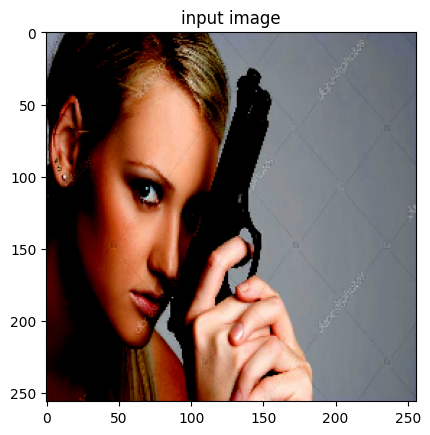

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

path = '/content/Test/pistol/pistol_9028.jpg'
img = load_img(path, target_size=(256, 256))

i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])

pred = np.argmax(model.predict(input_arr))
prob = np.amax(model.predict(input_arr))
if prob > 0.99:
  if pred == 0:
    print("The image is of a knife")
  else:
    print("The image is of a pistol")
else:
  print("There is no weapon.")

print(model.predict(input_arr))

plt.imshow(input_arr[0])
plt.title('input image')
plt.show()